# Approximate a simulated non-linear function

# Task
- Use fully connected network to approximate a simulated non-linear function

## Data Exploration

In [1]:
file_name = '/src/data/function_approximation/xy_data.csv'

import pandas as pd
import numpy as np
df = pd.read_csv(file_name, header=None)
print(df.shape)

(3, 2000)


In [28]:
np_vector = df.values.reshape((2000,3))
print(type(np_vector))
print(np_vector.shape)
print(np_vector[:5])

<class 'numpy.ndarray'>
(2000, 3)
[[-0.058929   0.16602    0.50408  ]
 [-0.63563   -0.63486   -0.9802   ]
 [-0.027678  -0.28429    0.99149  ]
 [ 0.0094964  0.73219   -0.68073  ]
 [ 0.79145   -0.2936     0.98416  ]]


input 1
min:-0.999010, max:0.997560, median:0.000000, mean:-0.003428, std:0.495501


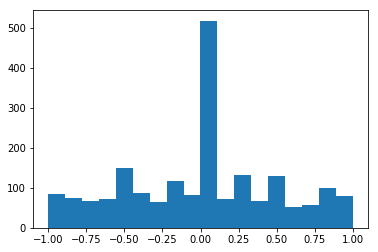

input 2
min:-0.999790, max:0.999340, median:0.000000, mean:-0.008440, std:0.500581


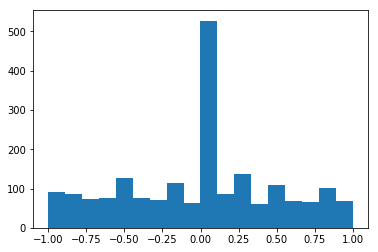

output
min:-0.999760, max:0.997750, median:0.000000, mean:0.004571, std:0.497965


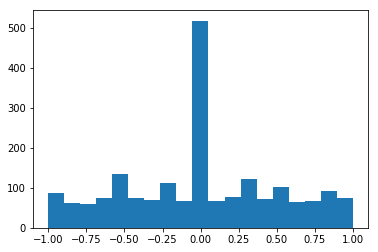

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

x = np_vector[:, 0]
y = np_vector[:, 1]
tk = np_vector[:,2]

def explore_vector(vector, message=None):
    assert type(vector) is np.ndarray
    assert vector.ndim == 1
    if message is not None:
        print(message)
    print('min:%f, max:%f, median:%f, mean:%f, std:%f' 
          % (np.min(vector), np.max(vector), np.median(vector), np.mean(vector), np.std(vector)))
    plt.hist(vector, bins='auto')
    plt.show()

explore_vector(x, "input 1")
explore_vector(y, "input 2")
explore_vector(tk, "output")

## Data Preparation

In [4]:
# Let's shuffle it
np.random.shuffle(np_vector)
print(np_vector[:5])

[[ 0.        0.        0.83    ]
 [ 0.82962  -0.23973  -0.2907  ]
 [-0.36758   0.99934   0.42777 ]
 [-0.97369   0.92816   0.55388 ]
 [ 0.88658   0.088969 -0.051139]]


In [5]:
# separate input and output
input_vector = np_vector[:, :2]
print('input shape:' + str(input_vector.shape))
print(input_vector[:5])

output_vecotr = np_vector[:, 2]
print('output shape:' + str(output_vecotr.shape))
print(output_vecotr[:5])

input shape:(2000, 2)
[[ 0.        0.      ]
 [ 0.82962  -0.23973 ]
 [-0.36758   0.99934 ]
 [-0.97369   0.92816 ]
 [ 0.88658   0.088969]]
output shape:(2000,)
[ 0.83     -0.2907    0.42777   0.55388  -0.051139]


In [6]:
pct_training = 0.9
pct_validation = 0.1

# separate training and test data
total_size = input_vector.shape[0]
training_size = int(total_size * pct_training)
test_size = total_size - training_size
val_size = int(training_size * pct_validation)

print('Total Size: %d, Train Size: %d, Validation Size: %d, Test Size: %d'
      % (total_size, training_size - val_size, val_size, test_size))

# slice data
train_in = input_vector[:training_size]
train_out = output_vecotr[:training_size]

test_in = input_vector[training_size:]
test_out = output_vecotr[training_size:]


val_in = train_in[:val_size]
val_out = train_out[:val_size]

train_in = train_in[val_size:]
train_out = train_out[val_size:]

print('train_in shape:' + str(train_in.shape))


Total Size: 2000, Train Size: 1620, Validation Size: 180, Test Size: 200
train_in shape:(1620, 2)


# Model Construction

In [13]:
from keras import models
from keras import layers

# construct model
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(2,)))
model.add(layers.Dense(32, activation='relu', input_shape=(2,)))
model.add(layers.Dense(32, activation='relu', input_shape=(2,)))
model.add(layers.Dense(32, activation='relu', input_shape=(2,)))
model.add(layers.Dense(16, activation='relu', input_shape=(2,)))
model.add(layers.Dense(16, activation='relu', input_shape=(2,)))
model.add(layers.Dense(16, activation='relu', input_shape=(2,)))
model.add(layers.Dense(8, activation='relu', input_shape=(2,)))
model.add(layers.Dense(1))

model.summary()
# compile model with optimizer, loss function
model.compile(optimizer='rmsprop',
              loss='mean_squared_error',
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                96        
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_8 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_9 (Dense)              (None, 16)                272       
__________

In [14]:
history = model.fit(train_in,
                    train_out,
                    epochs=40,
                    batch_size=32,
                    validation_data=(val_in, val_out))

Train on 1620 samples, validate on 180 samples
Epoch 1/40
1620/1620 [==============================] - 1s 312us/step - loss: 0.2443 - acc: 0.2154 - val_loss: 0.2686 - val_acc: 0.2667
Epoch 2/40
1620/1620 [==============================] - 0s 101us/step - loss: 0.2438 - acc: 0.2154 - val_loss: 0.2689 - val_acc: 0.2667
Epoch 3/40
1620/1620 [==============================] - 0s 99us/step - loss: 0.2443 - acc: 0.2154 - val_loss: 0.2684 - val_acc: 0.2667
Epoch 4/40
1620/1620 [==============================] - 0s 99us/step - loss: 0.2440 - acc: 0.2154 - val_loss: 0.2695 - val_acc: 0.2667
Epoch 5/40
1620/1620 [==============================] - 0s 103us/step - loss: 0.2443 - acc: 0.2154 - val_loss: 0.2694 - val_acc: 0.2667
Epoch 6/40
1620/1620 [==============================] - 0s 97us/step - loss: 0.2439 - acc: 0.2154 - val_loss: 0.2695 - val_acc: 0.2667
Epoch 7/40
1620/1620 [==============================] - 0s 110us/step - loss: 0.2440 - acc: 0.2154 - val_loss: 0.2692 - val_acc: 0.2667
Epoc

In [15]:
# check out history object
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

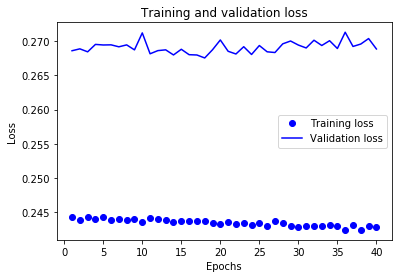

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

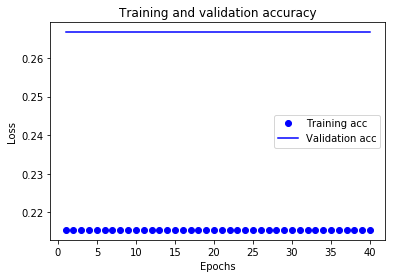

In [17]:
plt.clf()   # clear figure
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [18]:
# evaulate model with test data
results = model.evaluate(test_in, test_out)
results

200/200 [==============================] - 0s 34us/step


[0.2630823123455048, 0.2]

Accuracy in test data `21%`, loss `0.24` 